<h1 style="color:red">Mini projet entrepôt et fouille de données</h1>

@author: Jonathan YUE CHUN<br>
@author: Quentin LEVAVASSEUR<br>
@author: Valentin BOUCHEVREAU

<strong style="color:blue">[1] Données</strong>

TODO: createCSV from result(result format TBD)

In [63]:
import pandas
import numpy

class DataManager:
    
    def __init__(self, data, sheetName):
        xls = pandas.ExcelFile(data)
        self.df = xls.parse(sheetname=sheetName)
    
    def exportTOcsv(self, outputName, header=True):     
        df2 = self.df.fillna("")
        df2.to_csv(outputName+'.csv', encoding='utf-8', index=False, header=header)
        
    def dropColumns(self, columnsIndex):
        self.df = self.df.drop(self.df.columns[columnsIndex], axis=1)
        
    def dropRows(self, rowsIndex):
        self.df = self.df.drop(self.df[self.df.index[rowsIndex]], axis=0)
    
    def replaceColumnValue(self, columnName, regexString):   
        self.df[columnName] = self.df[columnName].str.replace(regexString, '')
        
    def columnToNumeric(self, columnName):
        self.df[columnName] = pandas.to_numeric(self.df[columnName], errors='coerce').fillna(0).astype(numpy.int64)
    
    def addColumn(self, columnName, columnValues):
        #columnValues is a list [...] containing a certain amount number of values intended to be inserted in the given column 
        self.df[columnName] = columnValues
        
    def getDataframe(self):
        df2 = self.df.fillna("")
        return df2

<strong style="color:blue">Extraction des feuilles xlsx et l'exporter en CSV (+Nettoyage)</strong>

<ul>
  <li>Pour les données de test, suppression des colonnes de prédictions (5 colonnes...).</li>
</ul>



In [64]:
dataManager1 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager1.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager1.columnToNumeric("PrevisionnelAnnuel")
dataManager1.columnToNumeric("NbSalaries")
#add a row example
#dataManager1.addColumn("coltest", list(range(1, (dataManager1.getDataframe().shape[0] + 1))))
#dataManager1.exportTOcsv("apprentissage", header=False)

dataManager2 = DataManager("Alphaprise.xlsx", "test")
dataManager2.dropColumns([34,35,36,37,38])
#dataManager2.exportTOcsv("test", header=False)

<strong style="color:blue">[2] Travail demandé</strong><br><br>
<strong>Analyse statistique</strong>

In [65]:
learningData = dataManager1.getDataframe()
testData = dataManager2.getDataframe()

averagePrevisionnelAnnuel = learningData['PrevisionnelAnnuel'].mean()
averageCapaciteEmprunt = learningData['CapaciteEmprunt'].mean()
averageNbSalaries = learningData['NbSalaries'].mean()
print("averagePrevisionnelAnnuel: " + str(averagePrevisionnelAnnuel) + "\t" + "averageCapaciteEmprunt: " + str(averageCapaciteEmprunt) + "\t" + "averageNbSalaries: " + str(averageNbSalaries) + "\n")

for i in range(1,31):
    temp = learningData["P"+str(i)].mean()
    print("P" + str(i) + " average: " + str(temp)+ "\n")


averagePrevisionnelAnnuel: 84088.18952100986	averageCapaciteEmprunt: 13985.954676638437	averageNbSalaries: 4.2472765000864605

P1 average: 6531.958552654355

P2 average: 1982.9198556112765

P3 average: 3843.604731108426

P4 average: 2458.2636460314684

P5 average: 2179.842723499917

P6 average: 2752.253797337018

P7 average: 698.4204616980809

P8 average: 640.177281687707

P9 average: 354.4432413971984

P10 average: 0.0

P11 average: 377.00858983226664

P12 average: 2772.456076430926

P13 average: 1930.4653544872945

P14 average: 2169.552788345147

P15 average: 109.95279180356226

P16 average: 2458.947484004836

P17 average: 0.26366159432820335

P18 average: 131.64165312121824

P19 average: 476.7135457375043

P20 average: 6786.025033719506

P21 average: 1563.0109216669537

P22 average: 1936.6075168597606

P23 average: 608.1426724883278

P24 average: 354.13560781601046

P25 average: 31.277587757219436

P26 average: 296.9638734220981

P27 average: 17.859086114473467

P28 average: 281.289

<p><strong style="color:red">Conclusion sur l'analyse de la moyenne sur les colonnes numériques</strong></p>
<ul>
    <li>On peut éliminer les deux colonnes <strong>P10</strong> et <strong>P17</strong> (car valeur très inférieurs aux autres colonne P) pour les futures analyses;</li>
    <li>Les colonnes <strong>P1, P3, P20</strong> se distincte. En effet, ces colonnes là possèdent des valeurs très au-dessus de tous les autres P;</li>
    <li>Des colonnes P restants, on distincte deux groupes, notamment <strong>(P2, P4, P5, P6, P12, P13, P14, P16, P21, P22)</strong> et <strong>(P7, P8, P9, P11, P15, P18, P19, P23, P24, P25, P26, P27, P28, P29, P30)</strong></li>
    <li>Pour la moyenne sur la colonne NbSalaries, il est nécessaire de le faire en plusieurs groupes différents. C'est-à-dire: une pour les entreprises à taille humaine (entre 4 - 20 employés), une pour les PME (entre 21 à 100 employés) et une pour les grande entreprises (100+ employés)</li>
<ul>

<strong>Faire émerger des secteurs d'activité à partir des données(le nombre de secteurs d'activité identifié par la direction des ventes est de 8 secteurs, en comptant les Particuliers et les Divers, mais ce chiffre n'est en aucun cas une valeur parfaite). <br>
    <p style="color:blue">Variables à exclure</p>au moins Secteur1, Secteur2, SecteurParticulier, SecteurDivers</strong>
    
D'après le raisonnement réalisé précédemment, on exclura également <strong>P10</strong> et <strong>P17</strong>

In [66]:
#Suppression des colonnes par rapport à l'index de la colonne (à exécuter une seule fois, sinon refaire l'importation des données)
dataManager1.dropColumns([1,2,3,4, 20, 27])

<strong>Eclatement de la donnée source en prenant compte l'hypothèse énoncé plus haut sur la colonne NbSalaries, c'est-à-dire qu'on cherchera à regrouper les différents catégories de clients ensembles...
Dans la suite, on cherchera à faire la même chose en considérant sur les colonnes P{1..30}</strong>
<ul>
    <li>données des entreprises où le nombre de salariés est inférieur à 6</li>
    <li>données des entreprises (PME): 21 à 100 employés</li>
    <li>données des entreprises de tailles importantes</li>
</ul>

In [67]:
smallCompanyData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] < 6]
mediumCompanyData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] > 6) & (dataManager1.getDataframe()['NbSalaries'] < 100)]
bigCompanyData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] > 100]

averageSmallCompanyData = smallCompanyData['NbSalaries'].mean()
averageMediumCompanyData = mediumCompanyData['NbSalaries'].mean()
averageBigCompanyData = bigCompanyData['NbSalaries'].mean()

print("Moyennes du nombres de salariés")
print("Petite entreprise/client individuel: " + str(int(averageSmallCompanyData)))
print("PME: " + str(int(averageMediumCompanyData)))
print("Grande entreprise: " + str(int(averageBigCompanyData)))
print("")
print("Petite entreprise/client individuel:")
for i in range(1,31):
    if i != 10 and i != 17:
        temp = smallCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")
        
print("PME: ")        
for i in range(1,31):
    if i != 10 and i != 17:
        temp = mediumCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")

print("Grande entreprise: ")
for i in range(1,31):
    if i != 10 and i != 17:
        temp = bigCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")

Moyennes du nombres de salariés
Petite entreprise/client individuel: 1
PME: 17
Grande entreprise: 386

Petite entreprise/client individuel:
PME: 
Grande entreprise: 


<strong>Visualisation des données statistiques...</strong>

Text(0,0.5,'NbEntreprises')

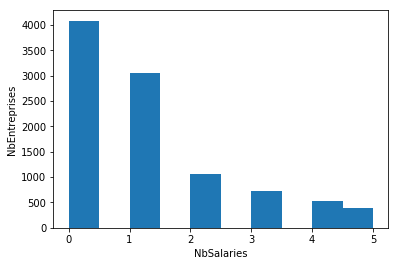

In [68]:
%matplotlib inline

hist1 = smallCompanyData['NbSalaries'].plot(kind='hist')
hist1.set_xlabel("NbSalaries")
hist1.set_ylabel("NbEntreprises")

Text(0,0.5,'NbEntreprises')

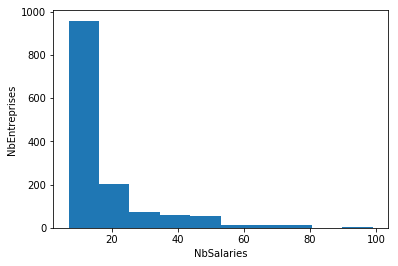

In [69]:
hist2 = mediumCompanyData['NbSalaries'].plot(x='_id', y='total', kind='hist')
hist2.set_xlabel("NbSalaries")
hist2.set_ylabel("NbEntreprises")

Text(0,0.5,'NbEntreprises')

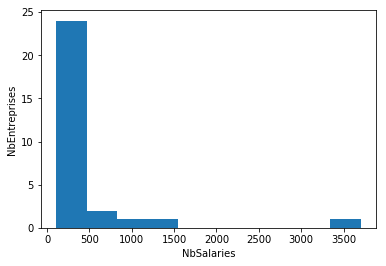

In [70]:
hist3 = bigCompanyData['NbSalaries'].plot(x='_id', y='total', kind='hist')
hist3.set_xlabel("NbSalaries")
hist3.set_ylabel("NbEntreprises")

Les trois histogrammes construits suggèrent qu'ils existent 5 catégories de clients:
<ul>
    <li>les particuliers;</li>
    <li>les start-ups;</li>
    <li>les PME;</li>
    <li>les grandes entreprises;</li>
    <li>et les entreprises de taille internationales.</li>
</ul>